In [50]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import datetime

In [51]:
youtube_2018_data_df = pd.read_csv("output/youtube2018.csv")
youtube_2018_data_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
0,x4TZEVqKIvs,01/01/18,Film Theory: Disney LIED to You! (High School ...,The Film Theorists,1,2017-12-30T20:15:11.000Z,"high school musical|""disney""|""high school musi...",2993235,135820,6207,19539,False,False,False,22,Sat,12/30/2017,20:15:11,2018
1,PjqKPHZJgF0,01/01/18,Lil Wayne - Family Feud feat. Drake (Official ...,Lil Wayne,10,2017-12-29T22:59:01.000Z,"lil wayne|""weezy""|""weezy wednesday""|""wayne car...",3266020,97709,4748,14172,False,False,False,31,Fri,12/29/2017,22:59:01,2018
2,O6BODAJVYc8,01/01/18,"2017, in 7 minutes",Vox,25,2017-12-30T13:00:04.000Z,"vox.com|""vox""|""explain""|""year in review""|""2017...",1565942,69361,13150,18227,False,False,False,12,Sat,12/30/2017,13:00:04,2018
3,mDRifR9HdK8,01/01/18,Best Pet Videos of the Year 2017!,The Pet Collective,15,2017-12-30T14:00:04.000Z,"the pet collective|""pet collective""|""the pet c...",277046,6878,265,389,False,False,False,26,Sat,12/30/2017,14:00:04,2018
4,HqwVFXyCfOI,01/01/18,Best of Hevesh5 (8),Hevesh5,24,2017-12-30T18:00:01.000Z,"domino|""dominos""|""dominoes""|""best of hevesh5""|...",630580,7512,451,562,False,False,False,30,Sat,12/30/2017,18:00:01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31344,BZt0qjTWNhw,06/14/18,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,False,14,Fri,05/18/2018,13:00:04,2018
31345,1h7KV2sjUWY,06/14/18,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,False,False,1,Fri,05/18/2018,01:00:06,2018
31346,D6Oy4LfoqsU,06/14/18,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,False,24,Fri,05/18/2018,17:34:22,2018
31347,oV0zkMe1K8s,06/14/18,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,False,22,Thu,05/17/2018,17:00:04,2018


In [52]:
time_df = youtube_2018_data_df[['views', 'publish_mhs']]
time_df["publish_hr"]=''

def HourConvert(time):
    return datetime.datetime.strptime(str(time), "%H:%M:%S").strftime('%H')
for index, row in time_df.iterrows():
    # Get date at each row
    publish_hour = row["publish_mhs"]
    time_df.loc[index, "publish_hr"] = HourConvert(publish_hour)
time_df.head()


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,views,publish_mhs,publish_hr
0,2993235,20:15:11,20
1,3266020,22:59:01,22
2,1565942,13:00:04,13
3,277046,14:00:04,14
4,630580,18:00:01,18


In [53]:
#create time bins
time_bins = [0, 2.9, 5.9, 8.9, 11.9, 15.9, 18.9, 21.9, 25]

time_bin_names = ["12AM-2:59AM", "3AM-5:59AM", "6AM-8:59AM", "9AM-11:59AM", "12PM-2:59PM", "3PM-5:59PM", "6PM-8:59PM", "9PM-11:59PM"]

time_df["Hour Published"] = pd.cut(time_df["publish_hr"].astype(int), time_bins, labels=time_bin_names, include_lowest=True)

time_df.drop(['publish_mhs'], axis = 1) 
time_df.head()


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,views,publish_mhs,publish_hr,Hour Published
0,2993235,20:15:11,20,6PM-8:59PM
1,3266020,22:59:01,22,9PM-11:59PM
2,1565942,13:00:04,13,12PM-2:59PM
3,277046,14:00:04,14,12PM-2:59PM
4,630580,18:00:01,18,3PM-5:59PM


In [54]:
time_df["Hour Published"].value_counts()

12PM-2:59PM    7923
3PM-5:59PM     7393
6PM-8:59PM     4951
12AM-2:59AM    2803
9PM-11:59PM    2643
3AM-5:59AM     2623
9AM-11:59AM    1557
6AM-8:59AM     1456
Name: Hour Published, dtype: int64

In [55]:
#statistal summary
time_views_group = time_df.groupby(["Hour Published"])
time_views_group.describe()

views                                                \
                 count          mean           std     min       25%   
Hour Published                                                         
12AM-2:59AM     2803.0  1.985146e+06  5.305212e+06   798.0  265403.5   
3AM-5:59AM      2623.0  5.146147e+06  1.824093e+07  2055.0  326472.0   
6AM-8:59AM      1456.0  3.776807e+06  9.242793e+06  1832.0  268924.0   
9AM-11:59AM     1557.0  4.870768e+06  1.404385e+07  2739.0  351519.0   
12PM-2:59PM     7923.0  2.773260e+06  5.823750e+06   549.0  352064.0   
3PM-5:59PM      7393.0  2.019438e+06  4.593269e+06  1164.0  323115.0   
6PM-8:59PM      4951.0  1.976015e+06  3.549261e+06   789.0  317349.5   
9PM-11:59PM     2643.0  2.041901e+06  4.926541e+06   658.0  285683.0   

                                                   
                     50%         75%          max  
Hour Published                                     
12AM-2:59AM     778702.0  1824191.00   71560694.0  
3AM-5:59AM      928925.0  2911406.00  225211923.0  
6AM-8:59AM      628306.0  2060057.75   69295519.0  
9AM-11:59AM     867320.0  2813831.00  139334502.0  
12PM-2:59PM     842594.0  2327224.00   94254507.0  
3PM-5:59PM      819989.0  1843401.00  122544931.0  
6PM-8:59PM      944114.0  2223551.00   56111957.0  
9PM-11:59PM     742087.0  1794910.50   71017021.0

Text(0.5, 1.0, 'Publish Time vs. Trending Youtube Videos')

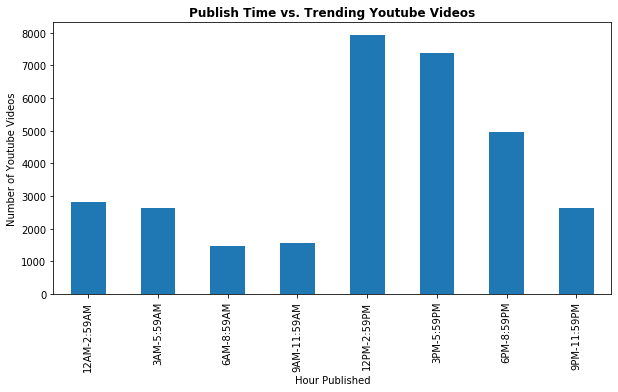

In [56]:
#time bins vs. number of videos bar chart
time_views_group = time_df.groupby(['Hour Published']).count()["views"]
bar_plot = time_views_group.plot(kind="bar", figsize=(10,5))
bar_plot.set_ylabel("Number of Youtube Videos")
plt.title("Publish Time vs. Trending Youtube Videos",fontweight="bold")


Text(0.5, 1.0, 'Publish Time vs. Average Number of Views')

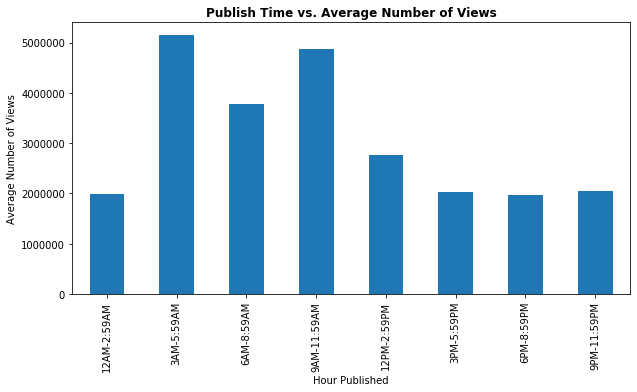

In [57]:
#time bins vs. average views 
time_views_group = time_df.groupby(['Hour Published']).mean()["views"]
bar_plot = time_views_group.plot(kind="bar", figsize=(10,5))
bar_plot.set_ylabel("Average Number of Views")
plt.title("Publish Time vs. Average Number of Views",fontweight="bold")

In [ ]:
#limitations/conclusions:

#Most trending youtube videos were posted mid afternoon from 12PM-3PM and from 3PM-6PM as a close second
#Videos posted from 3AM-6AM had the highest average number of views
#There were some outliers, for example 'Childish Gambino - This Is America' had the highest number of views of over 200 million and was published at 4AM.